Text(0, 0.5, 'X2')

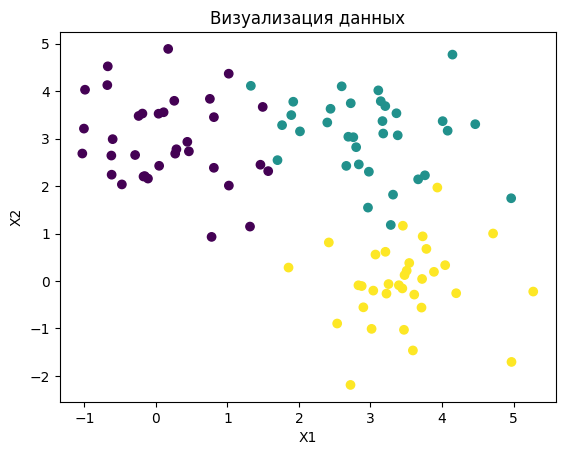

In [4]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

# Аргументы: Количество точек, центры кластеров, количество признаков для каждой точки данных, начальное значение для генератора случайных чисел, стандартное отклонение.
X, y = make_blobs(n_samples=100, centers=[(0, 3), (3, 3), (3, 0)], n_features=2, random_state=1,
                  cluster_std=(0.9, 0.9, 0.9))

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Визуализация данных')
plt.xlabel('X1')
plt.ylabel('X2')

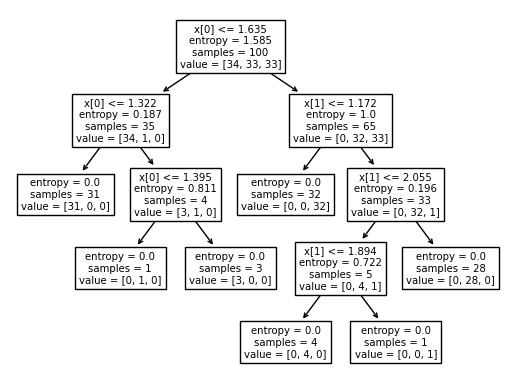

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Классификатор на основе решающих деревьев
# Аргументы: критерий разделения узлов, глубина деревьев для предотвращения переобучения
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=1)
clf_tree.fit(X, y)

# Визуализация построенного дерева
plot_tree(clf_tree)
plt.show()

NameError: name 'depth' is not defined

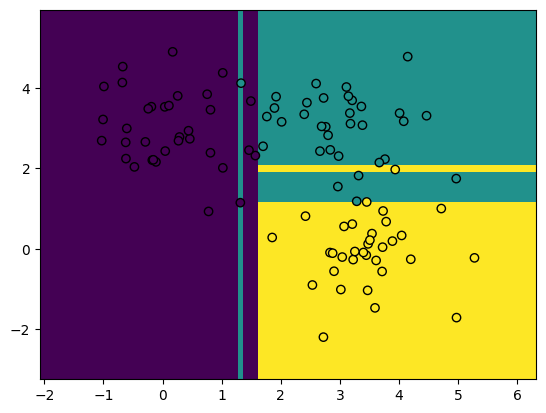

In [6]:
import numpy as np

# Одномерные массивы, содержащие значения равномерно распределенные между минимальными и максимальным значениеми признака из массива X
X0 = np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, X.shape[0])
X1 = np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, X.shape[0])

# Создание сетки из значений X0, X1. Используется для создания координатной сетки, нак которой будут построены разделяющие области
X0_grid, X1_grid = np.meshgrid(X0, X1)

# Преобразование в одномерные массивы и объединение в один двумерный массив, содержащий все возможные комбинации признаков
y_predict = np.c_[X0_grid.ravel(), X1_grid.ravel()]
# Предсказание меток классов для всех точек на этой сетке
y_predict = clf_tree.predict(y_predict)
# Преобразование обратно в двумерный массив
y_predict = y_predict.reshape(X0_grid.shape)

# Построение разделяющего цветового поля
plt.pcolormesh(X0_grid, X1_grid, y_predict)

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='black', linewidth=1)

plt.title(
    'Визуализация разделяющих областей, \n полученных при помощи решающего дерева, глубины depth={}'.format(depth))
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Оценка качества модели
y_pred = clf_tree.predict(X)
print(confusion_matrix(y, y_pred))
print('Accuracy =', accuracy_score(y, y_pred))
print('F1_score =', f1_score(y, y_pred, average='micro'))

## Загрузите встроенные данные sklearn.datasets.load_iris, взяв только последние два столбца (длина и ширина лепестков). Изобразите их на диаграмме рассеяния, подкрасив каждый класс некоторым цветом.

In [ ]:
from sklearn.datasets import load_iris

# Загрузка данных
iris = load_iris()
X = iris.data[:, 2:]  # Длина и ширина лепестков
y = iris.target

# Создание диаграммы рассеяния
plt.figure(figsize=(8, 6))

# Подкрашиваем точки в зависимости от класса
colors = ['red', 'green', 'blue']
for i in range(len(colors)):
    px = X[:, 0][y == i]
    py = X[:, 1][y == i]
    plt.scatter(px, py, c=colors[i], label=iris.target_names[i])

plt.xlabel('Длина лепестка (cm)')
plt.ylabel('Ширина лепестка (cm)')
plt.title('Диаграмма рассеяния данных Iris')
plt.legend(loc='best')
plt.show()

## Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева принятия решений.

In [ ]:
# Обучение модели Decision Tree с глубиной 4 и критерием энтропии
clf = DecisionTreeClassifier(max_depth=4, criterion="entropy")
clf.fit(X, y)

# Визуализация дерева
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree Classifier (max_depth=4, criterion=entropy)")
plt.show()

## Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier с разными глубинами (1, 2, 3, 4, 10), используя энтропию, и визуализируйте в каждом случае полученные разделяющие области.

In [ ]:
from sklearn.metrics import precision_score, recall_score

depths = [1, 2, 3, 4, 10]

for depth in depths:
    # Обучение модели Decision Tree с глубиной 4 и критерием энтропии
    clf = DecisionTreeClassifier(max_depth=depth, criterion="entropy")
    clf.fit(X, y)

    # Визуализация дерева
    plt.figure(figsize=(12, 8))
    plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
    plt.title(f"Decision Tree Classifier (max_depth={depth}, criterion=entropy)")
    plt.show()

    # Accuracy оценивает общую правильность предсказаний модели. Она представляет собой долю правильно классифицированных образцов от общего числа образцов.
    # Accuracy может быть искажена, если классы в данных несбалансированы.
    accuracy = accuracy_score(y, y_pred)
    # Precision измеряет долю правильно классифицированных положительных случаев среди всех случаев, которые модель предсказала как положительные.
    # Он полезен, когда ложные положительные результаты представляют проблему.
    precision = precision_score(y, y_pred, average='weighted')
    # Recall измеряет долю правильно классифицированных положительных случаев среди всех действительных положительных случаев в данных.
    # Он полезен, когда пропуск идентификации положительных случаев представляет проблему.
    recall = recall_score(y, y_pred, average='weighted')
    # F1 Score является гармоническим средним precision и recall. Это полезная метрика, когда вы хотите найти баланс между precision и recall.
    # Он представляет собой хороший способ объединить обе метрики в одну, особенно если вы ищете компромисс между точностью и полнотой.
    f1 = f1_score(y, y_pred, average='weighted')


## Загрузите весь датасет load_iris. Обучите модель классификационного дерева принятия решений sklearn.tree.DecisionTreeClassifier глубины 4, используя энтропию. Визуализируйте соответствующий граф дерева решений. Оцените качество работы модели.

In [ ]:
from sklearn.model_selection import cross_val_score

# Загрузка датасета Iris
iris = load_iris()
X = iris.data
y = iris.target

# Обучение модели Decision Tree с глубиной 4 и критерием энтропии
clf = DecisionTreeClassifier(max_depth=4, criterion="entropy")
clf.fit(X, y)

# Визуализация графа дерева решений
plt.figure(figsize=(12, 8))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.show()

# Оценка качества модели с помощью кросс-валидации
# Метод оценки производительности модели, который заключается в разделении исходного датасета на несколько частей (например, 5 частей при использовании 5-кратной кросс-валидации). Затем модель обучается на одной части данных (называемой обучающим набором) и тестируется на оставшихся данных (называемых тестовым набором). Этот процесс повторяется несколько раз, пока каждая часть данных не будет использована в качестве тестового набора.
scores = cross_val_score(clf, X, y, cv=5)
print("Средняя точность модели по кросс-валидации:", np.mean(scores))

## Загрузите встроенные данные sklearn.datasets.california_housing, взяв только столбец AveBedrms в качестве единственного признака. Изобразите данные на диаграмме рассеяния так, чтобы на одной оси были отмечены значения признака, а на другой - целевой переменной.

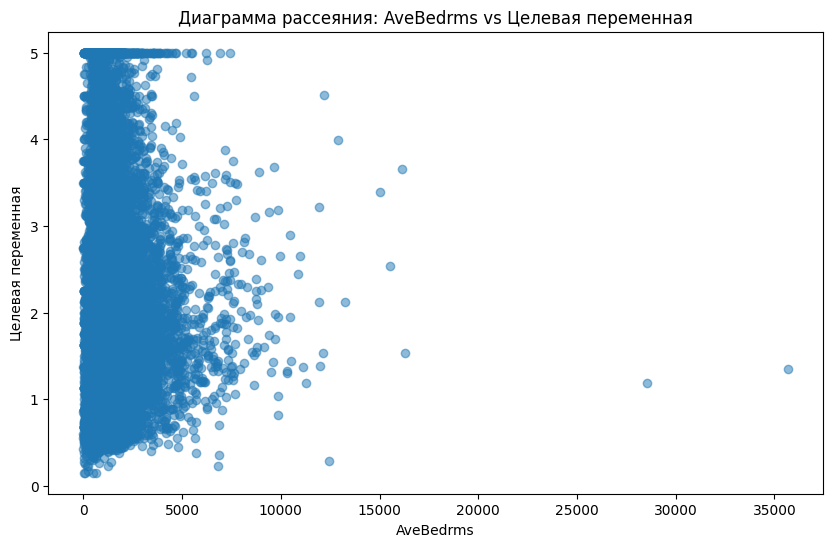

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Загрузка данных
data = fetch_california_housing()
X = data.data[:, 4]  # Выбираем столбец AveBedrms в качестве признака
y = data.target  # Целевая переменная

# Построение диаграммы рассеяния
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5)
plt.title('Диаграмма рассеяния: AveBedrms vs Целевая переменная')
plt.xlabel('AveBedrms')
plt.ylabel('Целевая переменная')
plt.show()


## Обучите модель регрессионного дерева принятия решений sklearn.tree.DecisionTreeRegressor, зафиксировав random_state=0, а остальными гиперпараметрами по умолчению.

In [8]:
from sklearn.tree import DecisionTreeRegressor

# Создание модели регрессионного дерева принятия решений
model = DecisionTreeRegressor(random_state=0)

# Обучение модели
model.fit(X.reshape(-1, 1), y)


DecisionTreeRegressor(random_state=0)

## Визуализируйте соответствующий граф дерева решений и получившуюся кусочную линию регрессии.

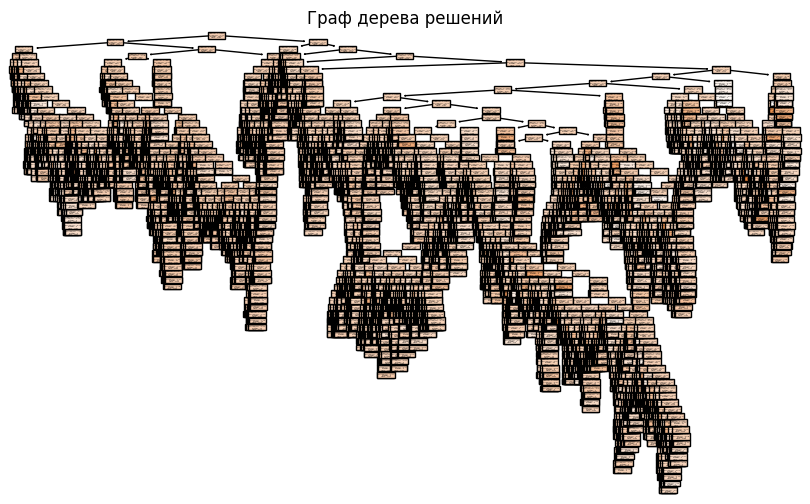

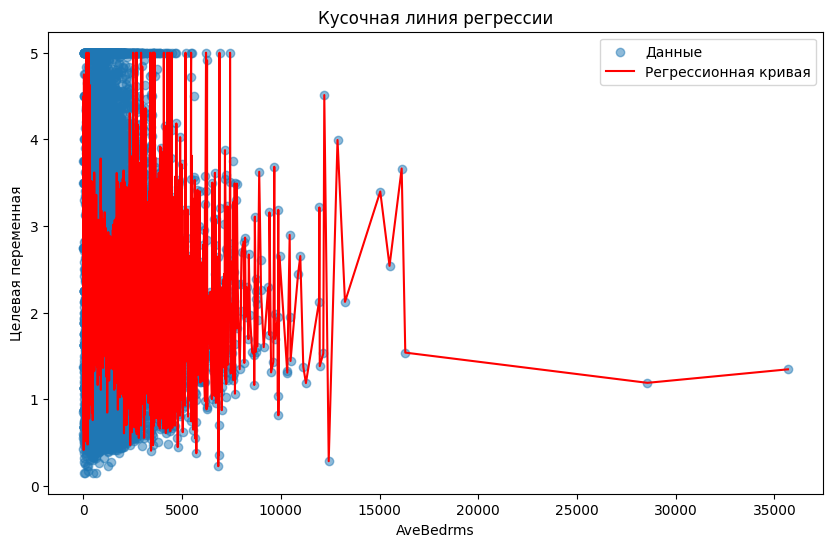

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Визуализация графа дерева решений
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['AveBedrms'])
plt.title('Граф дерева решений')
plt.show()

# Визуализация кусочной линии регрессии
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Данные')
plt.plot(np.sort(X), model.predict(np.sort(X).reshape(-1, 1)), color='red', label='Регрессионная кривая')
plt.title('Кусочная линия регрессии')
plt.xlabel('AveBedrms')
plt.ylabel('Целевая переменная')
plt.legend()
plt.show()